In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
#file paths
# train_data_filepath = 'C:/Users/harsh/Desktop/Gi_bots_assignment/train.csv'
# labels_file_path = 'C:/Users/harsh/Desktop/Gi_bots_assignment/trainLabels.csv'
# test_data_filepath = 'C:/Users/harsh/Desktop/Gi_bots_assignment/test.csv'
# result_file_path = 'C:/Users/harsh/Desktop/Gi_bots_assignment/submission.csv'
train_data_filepath = 'train.csv'
labels_file_path = 'trainLabels.csv'
test_data_filepath = 'test.csv'
result_file_path = 'submission.csv'

In [27]:
train_data = pd.read_csv(train_data_filepath)
train_data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 146 entries, id to x145
dtypes: float64(55), int64(31), object(60)
memory usage: 11.1+ MB


In [29]:
train_data.isnull().sum().value_counts()

0       98
1426    12
284     12
396     12
851     12
dtype: int64

In [30]:
train_data.isnull().sum().values

array([   0, 1426, 1426, 1426, 1426,    0,    0,    0,    0,    0, 1426,
       1426, 1426, 1426, 1426,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 1426, 1426, 1426,    0,    0,    0,    0,    0,  284,
        284,  284,  284,    0,    0,    0,    0,    0,  284,  284,  284,
        284,  284,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        284,  284,  284,    0,    0,    0,    0,  396,  396,  396,  396,
          0,    0,    0,    0,    0,  396,  396,  396,  396,  396,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  396,  396,  396,
          0,    0,    0,    0,  851,  851,  851,  851,    0,    0,    0,
          0,    0,  851,  851,  851,  851,  851,    0,    0,    0,    0,
          0,    0,    0,    0,    0,  851,  851,  851,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int64)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 146 entries, id to x145
dtypes: float64(55), int64(31), object(60)
memory usage: 11.1+ MB


In [32]:
# Checking all the categorical values in the training data
train_data.select_dtypes(include=['object']).iloc[0].values

array(['NO', 'NO', 'dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=',
       'GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=',
       's7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=', 'YES', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES',
       '+2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=', 'NO', 'NO',
       'Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=',
       'GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES',
       'bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=', 'NO', 'NO',
       '+dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=',
       'f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8=', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES'], dtype=object)

In [33]:
# feature engineering
categorical_data = train_data.select_dtypes(include=['object'])
list_of_categorical_data = []
for i,j in zip(list(categorical_data.columns), list(categorical_data.nunique())):
    if j>2:
        list_of_categorical_data.append(i)
categorical_data.drop(list_of_categorical_data, axis=1, inplace=True)

In [34]:
print(categorical_data)

       x1   x2  x10  x11  x12  x13  x14  x24  x25  x26  ... x116 x117 x126  \
0      NO   NO  YES   NO   NO   NO   NO  YES   NO  YES  ...   NO  YES  YES   
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NO   NO  YES   
2      NO   NO   NO   NO  YES   NO   NO   NO   NO   NO  ...   NO   NO   NO   
3     YES   NO  YES   NO   NO   NO   NO  YES   NO  YES  ...   NO  YES  YES   
4      NO   NO   NO   NO  YES   NO   NO   NO   NO   NO  ...   NO   NO   NO   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9994   NO   NO   NO   NO   NO   NO   NO   NO   NO   NO  ...   NO   NO  YES   
9995   NO   NO  YES   NO   NO   NO   NO  YES   NO  YES  ...   NO  YES  YES   
9996  YES  YES  YES   NO   NO   NO   NO  YES   NO  YES  ...   NO   NO  YES   
9997   NO   NO   NO   NO   NO   NO   NO   NO   NO   NO  ...   NO   NO   NO   
9998  YES  YES  YES   NO   NO   NO   NO  YES   NO  YES  ...   NO  YES  YES   

     x127 x128 x129 x130 x140 x141 x142  
0      NO   NO   NO  

In [35]:
print(list_of_categorical_data)

['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']


In [36]:
train_data[list_of_categorical_data]

,x3,x4,x34,x35,x61,x64,x65,x91,x94,x95
0,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=,s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=,+2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=,Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=,GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=,bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=,+dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=,f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8=
1,NaN,NaN,l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=,lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=,aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=
2,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,9TRXThP/ifDpJRGFX1LQseibUA1NJ3XM53gy+1eZ46k=,XSJ6E8aAoZC7/KAu3eETpfMg3mCq7HVBFIVIsoMKh9E=,cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=,oFsUwSLCWcj8UA1cqILh5afKVcvwlFA+ohJ147Wkz5I=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,mRPnGiKVOWTk/vzZaqlLXZRtdrkcQ/sX0hqBCqOuKq0=,oo9tGpHvTredpg9JkHgYbZAuxcwtSpQxU5mA/zUbxY8=
3,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,XQG0f+jmjLI0UHAXXH2RYL4MEHa+yd9okO+730PCZuc=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,Vl+TDNSupucNoI+Fqeo7bMCkxg1hRjgTSS6NYb9BW00=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=
4,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,XEDyQD4da6aJkZiBf+r7LD2VdhLGnCMsSpuRFUyCZgg=,Co/nVSLofrWsM5qpcKLXfekegArokgN29XjEXttuXK4=,wIHg6aGH2GMPX6l1pCTzeS1bXE4jxRqmd9ubES4HgW8=,ST8+q2Jgb91pWEwLwmSoJzXEGsQKeQGbzlLbgHPtj4w=,rB07AAHPffU4zFFF8IrqfKSltyWcPyy4+q+IM5SLZiQ=,WYQEP5EEzM+P+nfkHKLkGko/S3RdBgfEQ3IcyYwrChE=,fylJzYvYlM0+kRBeLB3eFKKgCibqxFvBa8hL+WStwCE=,IoM2E9pNxABFR+H3yfapUL+ThKm7GtTzY7js9H/H99o=
...,...,...,...,...,...,...,...,...,...,...
9994,jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,SRFkJlXGZgnI2svGQLoCAcrghqMRr+u5s36xzSMAOqg=,ubHy/++3FVAS97znZOt7L+cjkZFJREIiJPRZEfRIztc=,7uf0BQkpKFCgsoTY6hGENDudghJBAtKvDQ3VTc1nO7E=,lPUeS6siL3Hb9UUwnRC9piF2fYeBf+u85lUSgk4qgg4=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,NMZ5RsVp7WQ9rJP2seQnLYgSaJ7ga0FV3Ieg0DW59C0=,2QaQ5ANfKi6SrWtkIv5y7DUAmEz3dJXLn5fhhjBV8N8=,uO9xKdGEeEsG0BVm6VI/0XYd8E0DRuXXEa2gwcoKHcg=
9995,Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,gtvCdEuc1Tnjv6MSRDG8mAMO+KHeyqX/rg0IQwpdbi8=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zX9+hre+RQeHdvHyFAguXw2WNsshYzygopGqPn/BDLc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=
9996,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,9cgVS5E58bStBXAoRa9+MN4C7HpJh+UfM6/QcCwH0k4=,FExKgjj6CsbToTubdZ+kGsOmUx3gCvZVJCdZPcdPNF4=,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,c5oB4c9pSRTzkd4PmhzY4BazFbmVHbhy0lbyPp7aRbA=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zOxT5daF0yUlUsnKTZeXgFCmbLqtE7oBITbptqroU/Q=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=
9997,9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=,gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,zsF/C4x766PfoC59pZccSIWFOtQtiX/RPXB76PwIvIg=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,kZD8nTcJKVhhRKawBwobfk93XBOLQrH0jlf74jOnMuI=,Ymx/TSp54

In [37]:
numerical_data = train_data.select_dtypes(include=['int64','float64'])
numerical_data.drop('id', axis=1, inplace=True)
print(numerical_data)

            x5        x6        x7        x8        x9  x15       x16  x17  \
0     0.576561  0.073139  0.481394  0.115697  0.472474   42  0.396065    3   
1     0.000000  0.000000  0.000000  0.000000  0.000000    0  0.000000    0   
2     1.341803  0.051422  0.935572  0.041440  0.501710    2  0.838475    3   
3     0.653912  0.041471  0.940787  0.090851  0.556564   37  0.127405    8   
4     1.415919  0.000000  1.000000  0.000000  0.375297    1  0.523543    4   
...        ...       ...       ...       ...       ...  ...       ...  ...   
9994  1.207136  0.082855  0.918960  0.313880  0.495189   10  0.512852    3   
9995  1.414798  0.000000  1.000000  0.000000  0.357369    6  0.864350    4   
9996  1.413677  0.000000  1.000000  0.000000  0.668517    3  0.865471    6   
9997  1.294118  0.000000  1.000000  0.000000  0.570707    7  0.400871    8   
9998  0.660897  0.042735  0.946581  0.086966  0.510278   19  0.655128    4   

      x18       x19  ...  x133  x134      x135  x136   x137  x1

In [38]:
#loading labels data
labels = pd.read_csv(labels_file_path)
labels = labels[:9999]
labels.drop('id', axis=1, inplace=True)
labels.shape

(9999, 33)

In [39]:
#concatinating all the dataframe to get final dataframe
final_data = pd.concat([numerical_data, categorical_data, labels], axis=1)
final_data.head()

,x5,x6,x7,x8,x9,x15,x16,x17,x18,x19,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0.576561,0.073139,0.481394,0.115697,0.472474,42,0.396065,3,6,0.991018,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1.341803,0.051422,0.935572,0.041440,0.501710,2,0.838475,3,5,0.966122,...,0,0,0,0,0,0,0,0,0,0
3,0.653912,0.041471,0.940787,0.090851,0.556564,37,0.127405,8,15,0.959171,...,0,0,0,0,0,0,0,0,0,1
4,1.415919,0.000000,1.000000,0.000000,0.375297,1,0.523543,4,11,0.963004,...,0,0,0,0,0,0,0,0,0,1


In [40]:
final_data.shape

(9999, 168)

In [41]:
# numerical_features = categorical_data.select_dtypes(include=['int64, float64']).columns
numerical_features = numerical_data.select_dtypes(include=['int64, float64']).columns
categorical_features = categorical_data.select_dtypes(include=['object']).columns

In [42]:
#Data processing
#Creating transformers for numerical and categorical transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough'
)

# Seperate features and labels
X = final_data.drop(labels.columns, axis=1)
y = labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
y_train.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
9253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1561,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Model Selection

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

# Train and evaluate models
for model_name, model in models.items():
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', MultiOutputClassifier(model))])

    # Train the model
    full_pipeline.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = full_pipeline.predict(X_val)

    # Evaluate the model
    f1 = f1_score(y_val, y_val_pred, average='micro')
    precision = precision_score(y_val, y_val_pred, average='micro')
    recall = recall_score(y_val, y_val_pred, average='micro')
    conf_matrix = confusion_matrix(y_val.values.flatten(), y_val_pred.flatten())



    print(f"Evaluation Metrics for {model_name} on Validation Set:\n")
    print(f"F1 Score for {model_name} on Validation Set: {f1}")
    print(f"Precision for {model_name} on Validation Set: {precision}")
    print(f"Recall for {model_name} on Validation Set: {recall}\n")

Evaluation Metrics for Random Forest on Validation Set:

F1 Score for Random Forest on Validation Set: 0.7993155707650942
Precision for Random Forest on Validation Set: 0.8890701468189234
Recall for Random Forest on Validation Set: 0.7260213143872114

Evaluation Metrics for Decision Tree on Validation Set:

F1 Score for Decision Tree on Validation Set: 0.7253841159922095
Precision for Decision Tree on Validation Set: 0.7074715069649641
Recall for Decision Tree on Validation Set: 0.7442273534635879



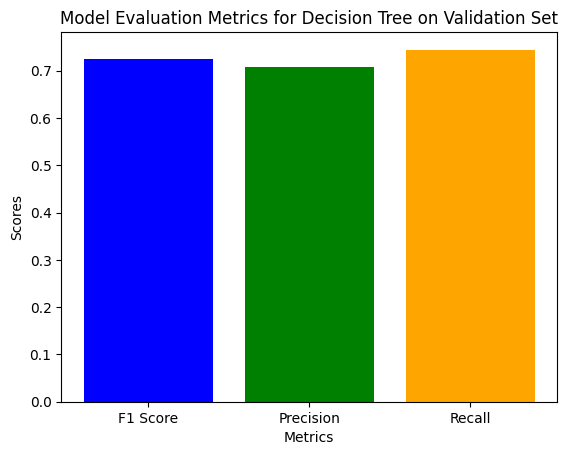

In [45]:

# Lists to store metrics and labels
metrics = ['F1 Score', 'Precision', 'Recall']
scores = [f1, precision, recall]

# Bar chart for model evaluation metrics
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title(f'Model Evaluation Metrics for {model_name} on Validation Set')
plt.show()


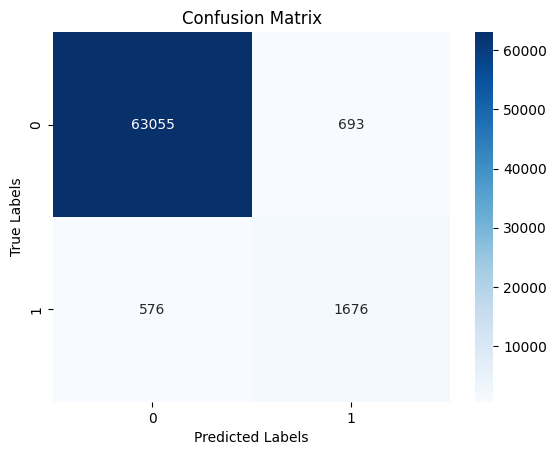

In [46]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [47]:
# Use the best-performing model for final predictions
best_model = models['Random Forest']
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', MultiOutputClassifier(best_model))])

In [48]:
# Define the hyperparameter grid
param_grid = {
    'classifier__estimator__n_estimators': [50, 100],
    'classifier__estimator__max_depth': [10, 20],
    'classifier__estimator__min_samples_split': [2, 5],
    'classifier__estimator__min_samples_leaf': [2, 4]
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(final_pipeline, param_grid, cv=2, scoring='f1_micro', n_jobs=-1)
# Train the final model on the entire dataset
grid_search.fit(X_train, y_train)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),...
       'x141', 'x142'],
      dtype='object'))])),
                                       ('classifier',
                                        MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)))]),
             n_jobs=-1,
             param_grid={'classifier__estimator__max_depth': [10, 20],
                         'classifier__estimator__min_samples_leaf': [2, 4],
                         'classifier__estimator__min_samples_split': [2, 5],
                         'classifier__estimator__n_estimators': [50, 100]},
             scoring='f1_micro')

In [49]:
# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'classifier__estimator__max_depth': 20, 'classifier__estimator__min_samples_leaf': 2, 'classifier__estimator__min_samples_split': 2, 'classifier__estimator__n_estimators': 50}


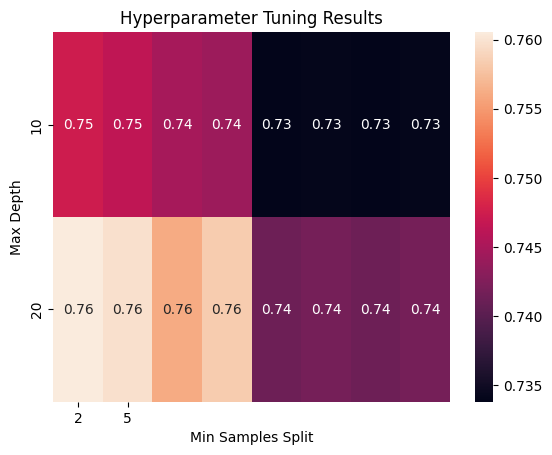

In [50]:

# Extract hyperparameter values and scores from the grid search results
param_grid_values = [param_grid['classifier__estimator__min_samples_split'],
                     param_grid['classifier__estimator__max_depth']]
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid_values[0]), -1)

# Heatmap for hyperparameter tuning results
sns.heatmap(scores, annot=True, xticklabels=param_grid_values[0], yticklabels=param_grid_values[1])
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Hyperparameter Tuning Results')
plt.show()


In [51]:
# Train the final model on the entire dataset with the best hyperparameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['x1', 'x2', 'x10', 'x11'...
       'x56', 'x57', 'x62', 'x63', 'x71', 'x72', 'x73', 'x74', 'x75', 'x85',
       'x86', 'x87', 'x92', 'x93', 'x101', 'x102', 'x103', 'x104', 'x105',
       'x115', 'x116', 'x117', 'x126', 'x127', 'x128', 'x129', 'x130', 'x140',
       'x141', 'x142'],
      dtype='object'))])),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                                        min_samples_leaf=2,
                                                                        n_estimators=50,
                                                                        random_state=42)))])

In [52]:
# Predict on the validation set
y_val_pred = final_model.predict(X_val)

# Evaluate the model
f1 = f1_score(y_val, y_val_pred, average='micro')
print(f"F1 Score on Validation Set: {f1}")

F1 Score on Validation Set: 0.7819660014781966


In [53]:
test_data = pd.read_csv(test_data_filepath)
test_data.head()

,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


In [54]:
column_names = ['id'] + [f'x{i}' for i in range(1, 146)]
test_data.columns = column_names

In [55]:
test_data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


In [56]:
# preprocessing test data similarly to train data
test_data_pre = test_data.drop("id", axis=1)

# cleaning test data
categorical_test_data = test_data_pre.select_dtypes(include=['object'])
list_of_categorical_data_ = []
for i,j in zip(list(categorical_test_data.columns),list(categorical_test_data.nunique())):
    if j>2:
        list_of_categorical_data_.append(i)
test_data_pre.drop(list_of_categorical_data_, axis=1,inplace=True)

test_predictions = final_model.predict(test_data_pre)


In [57]:
# Submission.csv
submission_df = pd.DataFrame(columns=['id_label', 'pred'])
for n,i in zip(range(test_predictions.shape[0]),test_data['id'].values):
    for j in range(test_predictions.shape[1]):
        submission_df = pd.concat([submission_df, pd.DataFrame({
            'id_label': [f"{i}_y{j+1}"],
            'pred': [test_predictions[n][j]]
        })], ignore_index=True)

submission_df.to_csv(result_file_path, index=False)